# Numpy

#### 1 功能：

- ndarray，一个具有矢量算术运算和复杂广播能力的快速且节省空间的多维数组；
- 用于对整组数组数据进行快速运算的标准数学函数（无需编写循环）；
- 用于读写磁盘数据的工具以及用于操作内存映射文件的工具；
- 线性代数、随机数生成以及傅里叶变换功能；

 在数据分析应用方面，功能是：
  - 用于数据整理和清理、子集构造和过滤、转换等快速的矢量化数据运算；
  - 常用的数组算法，如排序、唯一化、集合运算等；
  - 描述统计和数据聚合/摘要运算；
  - 用于异构数据集的合并/连接运算的数据对齐和关系型运算；
  - 将条件逻辑表述为数组表达式；
  - 数据的分组运算（聚合、转换、函数应用等）；

In [7]:
import numpy as np

In [8]:
my_arr=np.arange(1000000)

In [37]:
my_arr

array([     0,      1,      2, ..., 999997, 999998, 999999])

In [9]:
my_list=list(range(1000000))

In [10]:
%time for _ in range(10):my_arr2=my_arr*2

Wall time: 21.5 ms


In [12]:
%time for _ in range(10):my_list2=[x*2 for x in my_list]

Wall time: 690 ms


#### 2 ndarray：一种多维数组对象

大数据集容器，利用这种数组对整块数执行一些数学运算，其语法跟标量元素之间的运算一样。

In [14]:
import numpy as np

In [15]:
data=np.random.randn(2,3)

In [16]:
data

array([[ 1.40489178,  1.46769014, -0.17741143],
       [-0.00275477, -1.02202838,  0.39663208]])

In [17]:
data*10

array([[ 14.04891784,  14.67690144,  -1.77411428],
       [ -0.02754771, -10.22028384,   3.96632084]])

In [18]:
data+data

array([[ 2.80978357,  2.93538029, -0.35482286],
       [-0.00550954, -2.04405677,  0.79326417]])

**Note**:
ndarray是一个通用的同构数据多维容器，其中的所有元素必须是相同类型的。
       
       每个数组都有一个shape（一个表示各维度大小的元组）
       和一个dtype（一个用于说明数组数据类型的对象）。

In [19]:
data.shape

(2, 3)

In [20]:
data.dtype

dtype('float64')

#### 3 创建ndarray

使用array函数，它接受一切序列型的对象（包括其他数组），然后产生一个新的含有传入数据的NumPy数组。

In [21]:
data1=[6,6.75,3,8,2]

In [22]:
arr1=np.array(data1)

In [23]:
arr1

array([6.  , 6.75, 3.  , 8.  , 2.  ])

嵌套序列---->多维数组：

In [24]:
data2=[[1,2,3,4],[5,6,7,8]]

In [25]:
arr2=np.array(data2)

In [26]:
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [27]:
arr2.ndim

2

In [28]:
arr2.shape

(2, 4)

In [31]:
arr2.dtype

dtype('int32')

In [30]:
arr1.dtype

dtype('float64')

In [32]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [34]:
np.empty((2,3,2))

array([[[0.00000000e+000, 6.36598737e-314],
        [0.00000000e+000, 1.27319747e-313],
        [1.27319747e-313, 1.27319747e-313]],

       [[1.27319747e-313, 1.27319747e-313],
        [0.00000000e+000, 4.44659081e-323],
        [2.54639495e-313, 6.42285340e-323]]])

In [35]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

使用astype方法转换数组的dtype：

In [36]:
arr=np.array([1,2,3,4,5])

In [42]:
arr

array([1, 2, 3, 4, 5])

In [38]:
arr.dtype

dtype('int32')

In [39]:
float_arr=arr.astype(np.float64)

In [40]:
float_arr.dtype

dtype('float64')

In [41]:
float_arr

array([1., 2., 3., 4., 5.])

如果某字符串数组表示的全是数字，也可以用astype将其转换成数值形式。

不同大小的数组之间的运算叫做广播。

#### 4 数组运算

**基本的索引和切片**

In [2]:
import numpy as np

In [3]:
arr=np.arange(10)

In [4]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
arr[5]

5

In [7]:
arr[5:8]

array([5, 6, 7])

In [8]:
arr[5:8]=12

将一个标量值赋值给一个切片时，该值会自动传播到整个选区。

In [9]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

Note:numpy与列表的区别是，数组切片还是原始数组的视图，不会复制数据，视图上的任何修改都会直接反映到源数组上。
    
    but！
    如果想要得到的是ndarray切片的一份副本而非视图，就需要明确地进行复制操作，如.copy()

二维数组对单个元素访问，可以传入一个以逗号隔开地索引列表来选取单个元素。

In [10]:
arr2d=np.array([[1,2,3],[4,5,6],[7,8,9]])

In [11]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [12]:
arr2d[2]

array([7, 8, 9])

In [13]:
arr2d[1,2]

6

In [14]:
arr3d=np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])

In [15]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

numpy中的三维数组位置表示：2 x 2 x 3
（层，行，列）


In [16]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [17]:
old_values=arr3d[0].copy()

In [18]:
arr3d[0]=42

In [19]:
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [20]:
arr3d[0]=old_values

In [21]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

标量值和数组都可以被赋值给arr3d[0]

In [27]:
arr3d[:,0,2]

array([3, 9])

In [28]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [29]:
arr[1:6]

array([ 1,  2,  3,  4, 12])

In [30]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [35]:
arr2d[:,:2]

array([[1, 2],
       [4, 5],
       [7, 8]])

注意：“：”表示选取整个轴；

**布尔型索引**

In [44]:
names=np.array(['Bob','Joe','Will'])

In [37]:
data=np.random.randn(3,4)

In [45]:
names

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [39]:
data

array([[-0.09518268, -1.51425867, -0.59587295,  0.80270078],
       [ 0.97658919,  1.46980655,  1.34230026,  1.25382926],
       [ 0.53762463,  0.84756138,  0.10565454, -1.45123144]])

In [46]:
names=='Bob'

array([ True, False, False])

In [47]:
data[names=='Bob']

array([[-0.09518268, -1.51425867, -0.59587295,  0.80270078]])

In [48]:
data[data<0]=0

In [49]:
data

array([[0.        , 0.        , 0.        , 0.80270078],
       [0.97658919, 1.46980655, 1.34230026, 1.25382926],
       [0.53762463, 0.84756138, 0.10565454, 0.        ]])

**花式索引**

利用整数数组进行索引。

In [51]:
arr=np.empty((8,4))

In [53]:
for i in range(8):
    arr[i]=i

In [54]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [55]:
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [56]:
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [58]:
arr=np.arange(32).reshape((8,4))

In [59]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [61]:
arr[[1,5,7,2],[0,3,1,2]]

array([ 4, 23, 29, 10])

上面其实是选取元素。

无论数组是多少维的，花式索引总是一维的。

    花式索引跟切片不一样，它总是将数据复制到新数组中。

#### 5 数组转置和轴对换

转置是重塑的一种特殊形式，它返回的是源数据的视图（不会进行任何复制操作）。

In [62]:
arr.T

array([[ 0,  4,  8, 12, 16, 20, 24, 28],
       [ 1,  5,  9, 13, 17, 21, 25, 29],
       [ 2,  6, 10, 14, 18, 22, 26, 30],
       [ 3,  7, 11, 15, 19, 23, 27, 31]])

In [63]:
arr2=np.random.randn(8,3)

In [65]:
arr2

array([[-1.49985625,  0.56200177, -1.37955217],
       [-1.74981032,  0.58689128,  0.23854568],
       [ 0.01936354,  0.60258797, -1.3069756 ],
       [ 0.66281976, -1.90307932,  0.92629086],
       [ 0.18994241, -1.10001315,  0.83441865],
       [-2.07167391,  0.17017836,  0.5018686 ],
       [-0.97645985,  1.34948967, -0.77108217],
       [-0.56170444,  0.98155489, -1.62344717]])

In [66]:
np.dot(arr.T,arr2)

array([[-76.44765607,  30.00596277, -38.96055418],
       [-82.43503512,  31.25557423, -41.5404875 ],
       [-88.42241417,  32.5051857 , -44.12042082],
       [-94.40979322,  33.75479716, -46.70035414]])

#### 6 通用函数：快速的元素级数组函数

一种对ndarray中的数据执行元素级运算的函数。

#### 7 利用数组进行数据处理

用数组表达式代替循环的做法，通常称为矢量化。

In [8]:
import numpy as np

In [9]:
points=np.arange(-5,5,0.01)
#1000 equally spaced points

In [10]:
xs,ys=np.meshgrid(points,points)

In [11]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [12]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [13]:
z=np.sqrt(xs**2+ys**2)

In [14]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

In [15]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2+y^2}$ for a grid of values')

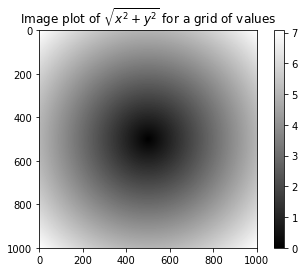

In [21]:
plt.imshow(z,cmap=plt.cm.gray);plt.colorbar()
plt.title("Image plot of $\sqrt{x^2+y^2}$ for a grid of values")

#### 9 将条件逻辑表述为数组运算

numpy.where函数是三元表达式x if condition else y的矢量化版本。
np.where的第二个和第三个参数不必是数组，可以是标量值。

#### 10 数学和统计方法

通过数组上的一组数学函数对整个数组或某个轴向的数据进行统计计算。
sum、mean以及标准差std等聚合计算。

例：聚类统计

In [22]:
arr =np.random.randn(5,4)

In [23]:
arr

array([[ 1.68807217,  0.38568272, -0.47798487,  1.34981809],
       [-1.84818097,  2.086547  ,  0.6593583 ,  0.70016204],
       [ 0.79611311, -1.28004483,  0.71850317,  1.54041373],
       [ 0.35086936, -0.14988782, -1.21357278,  0.55500666],
       [ 0.55776649,  1.22635737, -0.15989414,  0.31119634]])

In [24]:
arr.mean()

0.3898150571143094

In [25]:
np.mean(arr)

0.3898150571143094

In [32]:
np.mean(arr[0])

0.7363970283822573

In [26]:
arr.sum()

7.796301142286189

In [27]:
arr.mean(axis=1)

array([ 0.73639703,  0.39947159,  0.44374629, -0.11439615,  0.48385651])

In [28]:
arr.sum(axis=0)

array([ 1.54464016,  2.26865445, -0.47359032,  4.45659685])

In [29]:
arr.max()

2.0865470033267743

In [30]:
arr[0].max()

1.6880721662782041

In [31]:
arr.argmax()

5

#### 11 用于布尔型数组的方法

In [33]:
arr=np.random.randn(100)

In [34]:
arr

array([-0.27637069,  0.36894693, -0.41593053,  0.36529736,  0.81004187,
       -1.19058492, -0.53307012,  0.23106689, -0.51415074,  0.42285055,
        1.19665711, -0.35460785,  0.10310672, -0.21182063,  0.72496724,
        0.06181566, -0.39654938, -0.02535603,  0.13174061, -0.93900028,
        1.53093596, -0.09439157, -0.57433128, -0.48291596, -0.53090719,
       -2.19425979,  0.21474065,  0.27896514,  0.50234291, -1.11841272,
        0.93178943, -0.45246748,  0.70731151,  0.86616041, -0.69782565,
       -0.6999199 ,  0.13021971, -0.86650097,  0.8106948 , -0.90911469,
       -0.73248069, -0.14716586,  0.04806374,  1.16552213,  0.14866199,
       -0.3814359 ,  1.83597855, -1.20743652,  0.05506855,  0.67583614,
        1.54561058, -0.59868883,  0.11606075,  0.10522038,  1.35541685,
        0.00292061, -0.32911728, -0.87815382,  0.28821274, -1.12664631,
        0.95334228, -0.96323335, -0.51164198,  0.986377  , -1.30135577,
        0.21850594,  1.41599528, -1.33888746, -0.38297027, -1.43

In [35]:
(arr>0).sum()

46

实现方法：

     any——用于测试数组中是否存在一个或多个True；
     all——检查数组中所有值是否都是True。

#### 12 排序

In [36]:
arr=np.random.randn(6)

In [37]:
arr

array([ 0.16191123,  0.79009807, -0.30689904,  0.5714354 , -1.21643672,
       -0.28483014])

In [40]:
arr.sort()

In [41]:
arr

array([-1.21643672, -0.30689904, -0.28483014,  0.16191123,  0.5714354 ,
        0.79009807])

多维数组排序

In [42]:
arr=np.random.randn(5,3)

In [43]:
arr

array([[ 0.04625265,  1.10338481, -0.82712859],
       [ 0.09708683,  1.85176505,  0.11595857],
       [ 0.05106313, -1.31326781, -0.71362933],
       [ 0.79744338,  0.25268749,  0.09384247],
       [-0.38869176,  0.80293126, -0.09064637]])

In [44]:
arr.sort(1)

In [45]:
arr

array([[-0.82712859,  0.04625265,  1.10338481],
       [ 0.09708683,  0.11595857,  1.85176505],
       [-1.31326781, -0.71362933,  0.05106313],
       [ 0.09384247,  0.25268749,  0.79744338],
       [-0.38869176, -0.09064637,  0.80293126]])

In [47]:
np.sort(arr)

array([[-0.82712859,  0.04625265,  1.10338481],
       [ 0.09708683,  0.11595857,  1.85176505],
       [-1.31326781, -0.71362933,  0.05106313],
       [ 0.09384247,  0.25268749,  0.79744338],
       [-0.38869176, -0.09064637,  0.80293126]])

#### 13 唯一化以及其它的集合逻辑

针对一维ndarray的基本集合运算，np.unique用于找出数组中的唯一值并返回已排序的结果。

#### 14 用于数组的文件输入输出

NumPy能够读写磁盘上的文本数据或二进制数据。

    np.save和np.load是读写磁盘数组数据的两个主要函数。

    默认情况下，数组是以未压缩的原始二进制格式保存在扩展名为.npy的文件中。

In [48]:
arr=np.arange(10)

In [49]:
np.save('some_array',arr)

In [50]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### 15 线性代数

In [53]:
x=np.array([[1,2,3],[4,5,6]])

In [54]:
y=np.array([[5,3],[2,6],[-1,4]])

In [55]:
x

array([[1, 2, 3],
       [4, 5, 6]])

In [56]:
y

array([[ 5,  3],
       [ 2,  6],
       [-1,  4]])

In [57]:
x.dot(y)

array([[ 6, 27],
       [24, 66]])

In [58]:
np.dot(x,y)

array([[ 6, 27],
       [24, 66]])

numpy.linalg中有一组标准的矩阵分解运算以及诸如求逆和行列式之类的东西。

In [59]:
from numpy.linalg import inv,qr

In [60]:
X=np.random.randn(5,5)

In [61]:
mat=X.T.dot(X)

In [62]:
inv(mat)

array([[ 0.80241301, -1.29905423, -0.32122461,  2.05172633, -0.14336344],
       [-1.29905423,  8.98555138,  0.56213941, -8.7422045 , -1.0127409 ],
       [-0.32122461,  0.56213941,  0.32576551, -0.82538689,  0.11545969],
       [ 2.05172633, -8.7422045 , -0.82538689,  9.98775908,  0.54471434],
       [-0.14336344, -1.0127409 ,  0.11545969,  0.54471434,  0.44236612]])

In [63]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  1.52983930e-15,  1.31465355e-16,
        -1.14770989e-15, -7.57563853e-17],
       [-1.40129174e-16,  1.00000000e+00, -1.34994771e-16,
         4.68760417e-16, -2.50932423e-18],
       [-3.08045118e-16,  1.60285760e-15,  1.00000000e+00,
         1.07885958e-16, -1.40230221e-16],
       [ 6.47770409e-17,  5.90869008e-17, -2.71207502e-16,
         1.00000000e+00,  2.26567621e-16],
       [ 3.16330470e-16, -8.41229560e-17, -2.90307982e-17,
         2.28244313e-15,  1.00000000e+00]])

In [64]:
q,r=qr(mat)

In [65]:
r

array([[-7.47093946,  2.86172638, -3.78812666,  3.74789881,  0.28044759],
       [ 0.        , -2.94809533,  2.42584896, -2.05204252, -6.62065705],
       [ 0.        ,  0.        , -5.14455947, -0.5851706 ,  2.40278874],
       [ 0.        ,  0.        ,  0.        , -0.13809951,  1.25875451],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.80271982]])

#### 16 伪随机数生成

numpy.random模块是对Python内置的random进行补充，增加了一些用于高效生成多种概率分布的样本值的函数。

In [66]:
samples=np.random.normal(size=(4,4))

In [67]:
samples

array([[-0.74176858, -0.88225112,  0.17347685, -2.3479306 ],
       [ 0.26840116, -0.78300733,  1.60360806, -1.16995309],
       [ 0.16233599, -0.68222772, -0.89681811,  1.18056901],
       [ 1.76849731,  0.53755947, -0.66543098, -0.30106586]])

In [68]:
from random import normalvariate

In [69]:
N=1000000

In [70]:
%timeit samples=[normalvariate(0,1) for _ in range(N)]

778 ms ± 17.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [71]:
%timeit np.random.normal(size=N)

26.9 ms ± 313 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [72]:
np.random.seed(1234)

numpy.random的数据生成函数使用了全局的随机种子。要避免全局状态，可以使用numpy.random.RandomState,创建一个与其它隔离的随机数生成器。

In [73]:
rng=np.random.RandomState(1234)

In [74]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

#### 示例：随机漫步

In [77]:
import random
position=0
walk=[position]
steps=1000
for i in range(steps):
    step=1 if random.randint(0,1) else -1
    position+=step
    walk.append(position)

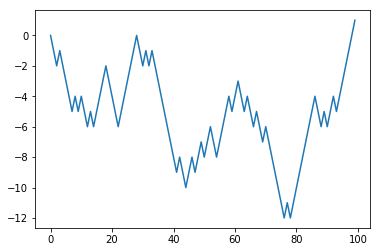

In [78]:
plt.plot(walk[:100])

In [81]:
nsteps=1000
draws=np.random.randint(0,2,size=nsteps)
steps=np.where(draws>0,1,-1)
walk=steps.cumsum()

In [82]:
walk.min()

1

In [83]:
walk.max()

47